In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df = pd.read_csv("universities.csv")

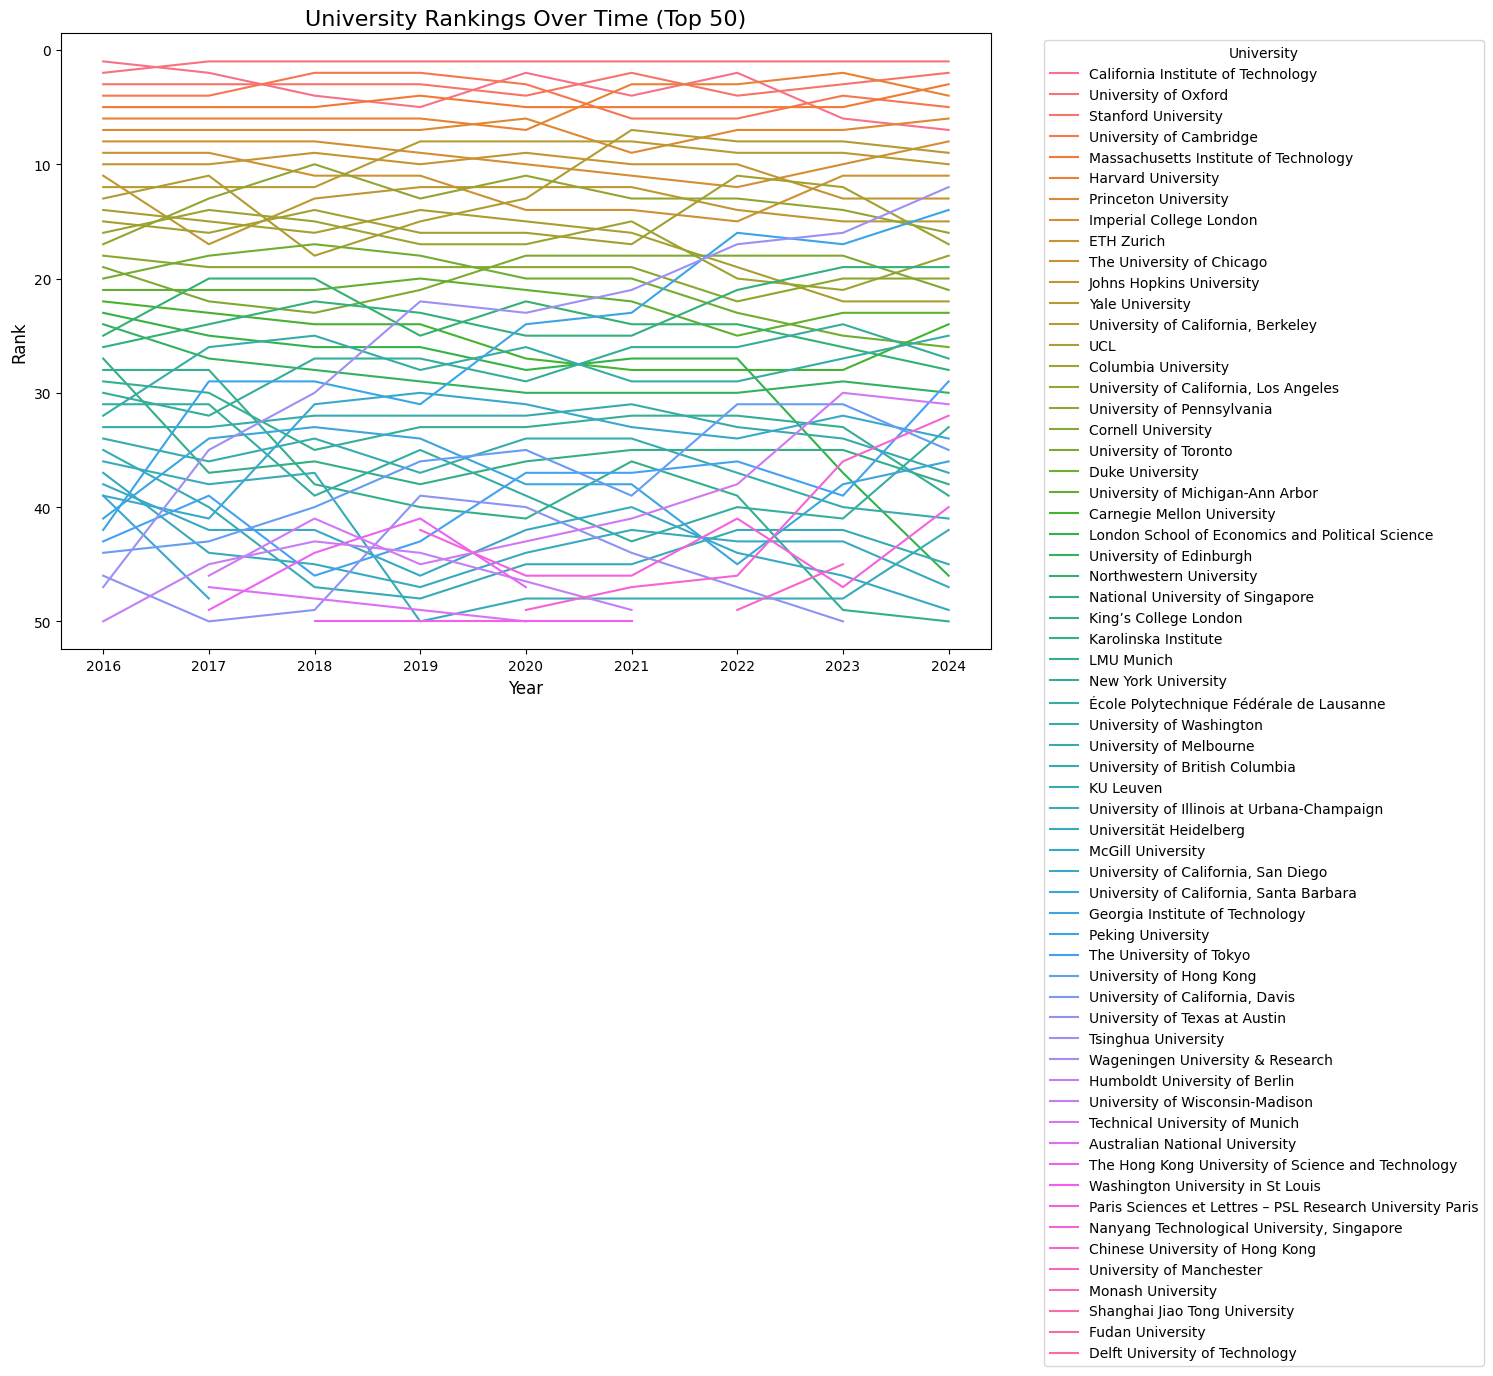

In [138]:
# displaying top 50 universities from 20
top50 = df.copy()
top50 = top50[top50['Rank'] <= 50]
top50 = top50[top50['Year'] != 2025]

plt.figure(figsize=(12, 8))
sns.lineplot(data=top50, x='Year', y='Rank', hue='Name', linewidth=1.5)
plt.gca().invert_yaxis()
plt.title("University Rankings Over Time (Top 50)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Rank", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='University')
plt.show()

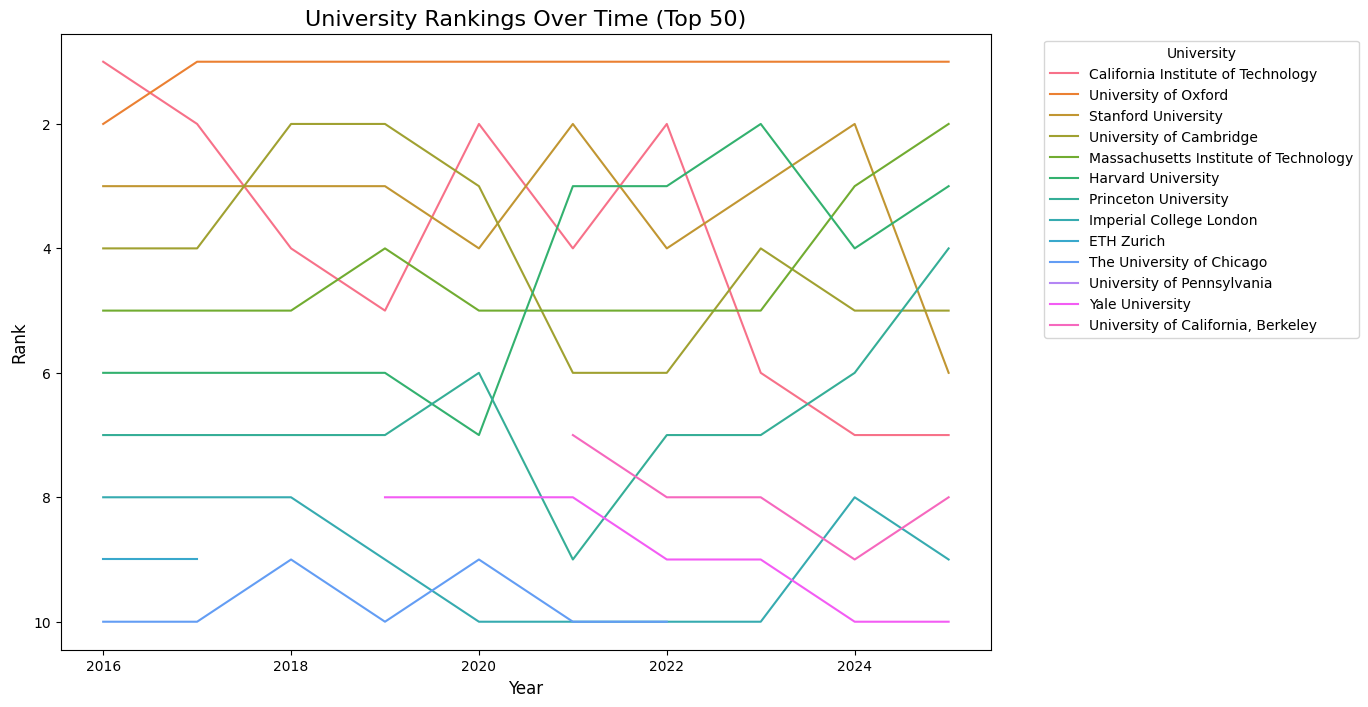

In [133]:
top10 = df.copy()
top10 = top10[top10['Rank'] <= 10]
plt.figure(figsize=(12, 8))
sns.lineplot(data=top10, x='Year', y='Rank', hue='Name', linewidth=1.5)
plt.gca().invert_yaxis()
plt.title("University Rankings Over Time (Top 50)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Rank", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='University')
plt.show()

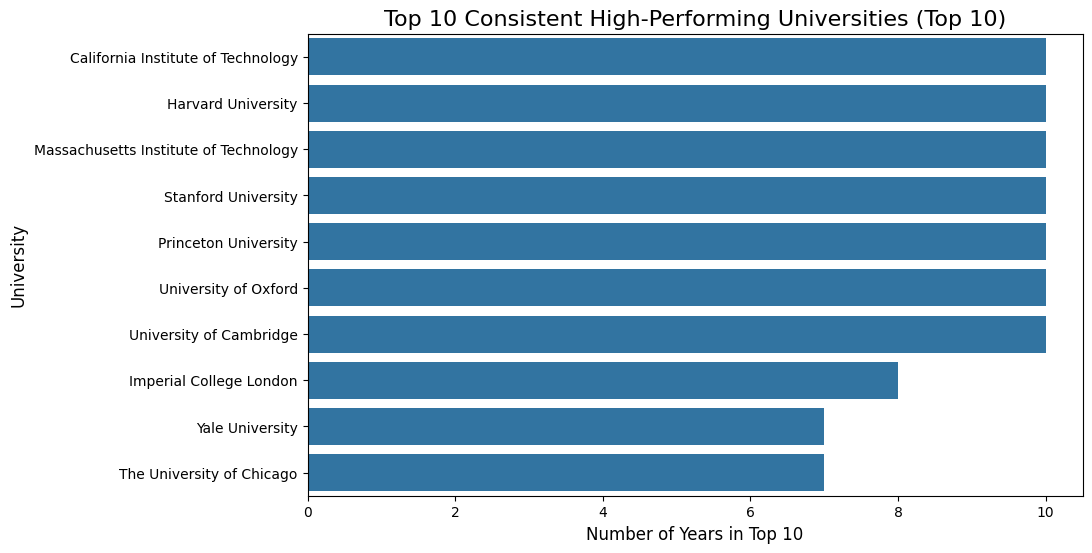

In [134]:
# highlight the universities that seem to perform really well consecutively
consistent_performers = (
    top10.groupby('Name')['Year']
    .count()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=consistent_performers.values, y=consistent_performers.index)
plt.title("Top 10 Consistent High-Performing Universities (Top 10)", fontsize=16)
plt.xlabel("Number of Years in Top 10", fontsize=12)
plt.ylabel("University", fontsize=12)
plt.show()


In [159]:
df_copy = df.copy()
fields_of_study = ['Teaching', 'Research Environment', 'Research Quality', 'Industry Impact', 'International Outlook']

top_universities_by_field = {}
aggregated_df = df_copy.groupby('Name')[fields_of_study].mean().reset_index()  # Use mean or max here

for field in fields_of_study:
    top_universities = (
        aggregated_df[['Name', field]]
        .sort_values(by=field, ascending=False)
        .head(3)
    )
    top_universities_by_field[field] = top_universities

for field, top_universities in top_universities_by_field.items():
    print(f"\nTop 3 Universities in {field} (Aggregated Over All Years):\n")
    print(top_universities)



Top 3 Universities in Teaching (Aggregated Over All Years):

                                       Name  Teaching
192      California Institute of Technology     93.68
1320                    Stanford University     93.58
825   Massachusetts Institute of Technology     91.95

Top 3 Universities in Research Environment (Aggregated Over All Years):

                         Name  Research Environment
1953     University of Oxford                 99.55
490        Harvard University                 98.92
1684  University of Cambridge                 98.73

Top 3 Universities in Research Quality (Aggregated Over All Years):

                                       Name  Research Quality
1320                    Stanford University             99.83
825   Massachusetts Institute of Technology             99.76
490                      Harvard University             99.45

Top 3 Universities in Industry Impact (Aggregated Over All Years):

                                                   Na

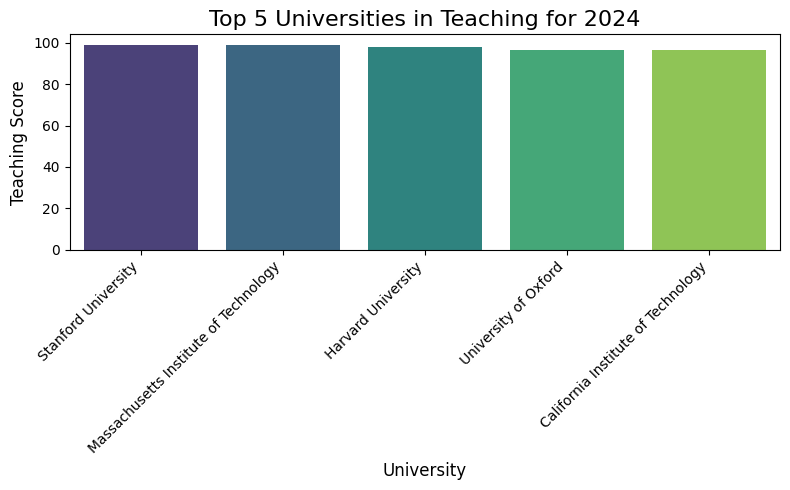

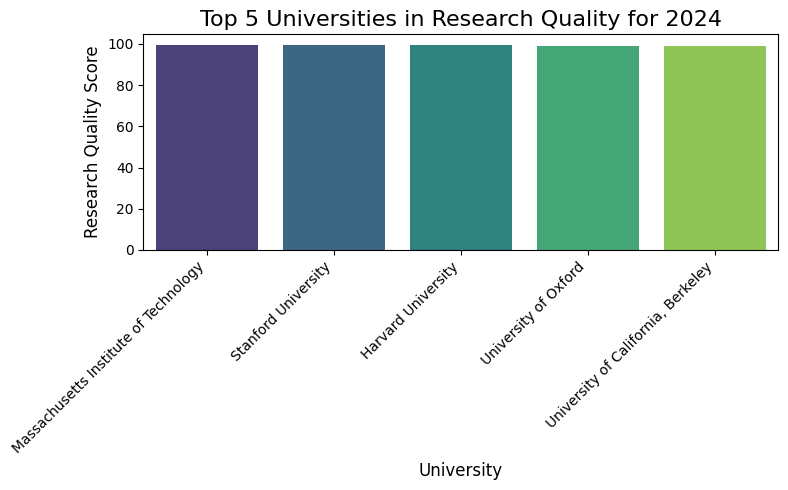

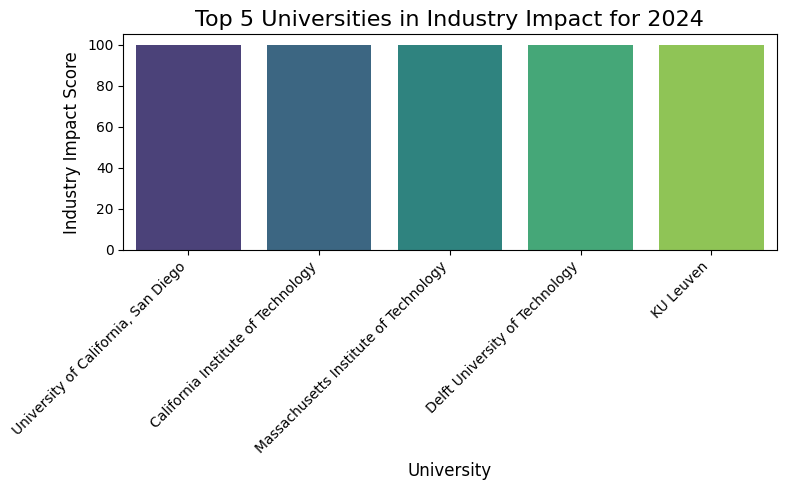

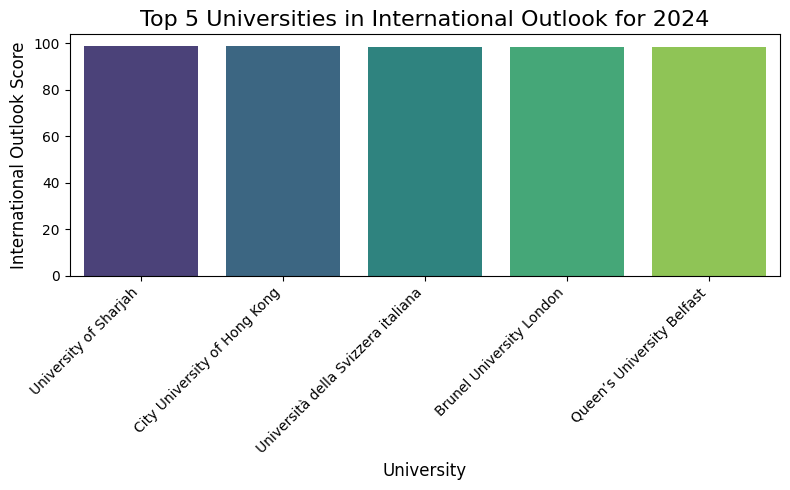

In [153]:
df_copy = df.copy()
fields_of_study = ['Teaching', 'Research Quality', 'Industry Impact', 'International Outlook']
df_2024 = df_copy[df_copy['Year'] == 2024]

top_universities_by_field_2024 = {}

for field in fields_of_study:
    top_universities = (
        df_2024[['Name', field]]
        .sort_values(by=field, ascending=False)
        .head(5)
    )
    top_universities_by_field_2024[field] = top_universities

for field, top_universities in top_universities_by_field_2024.items():
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=top_universities,
        y=field,
        x='Name',
        palette='viridis',
        hue='Name',
        legend=False
    )
    plt.title(f"Top 5 Universities in {field} for 2024", fontsize=16)
    plt.xlabel("University", fontsize=12)
    plt.ylabel(f"{field} Score", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


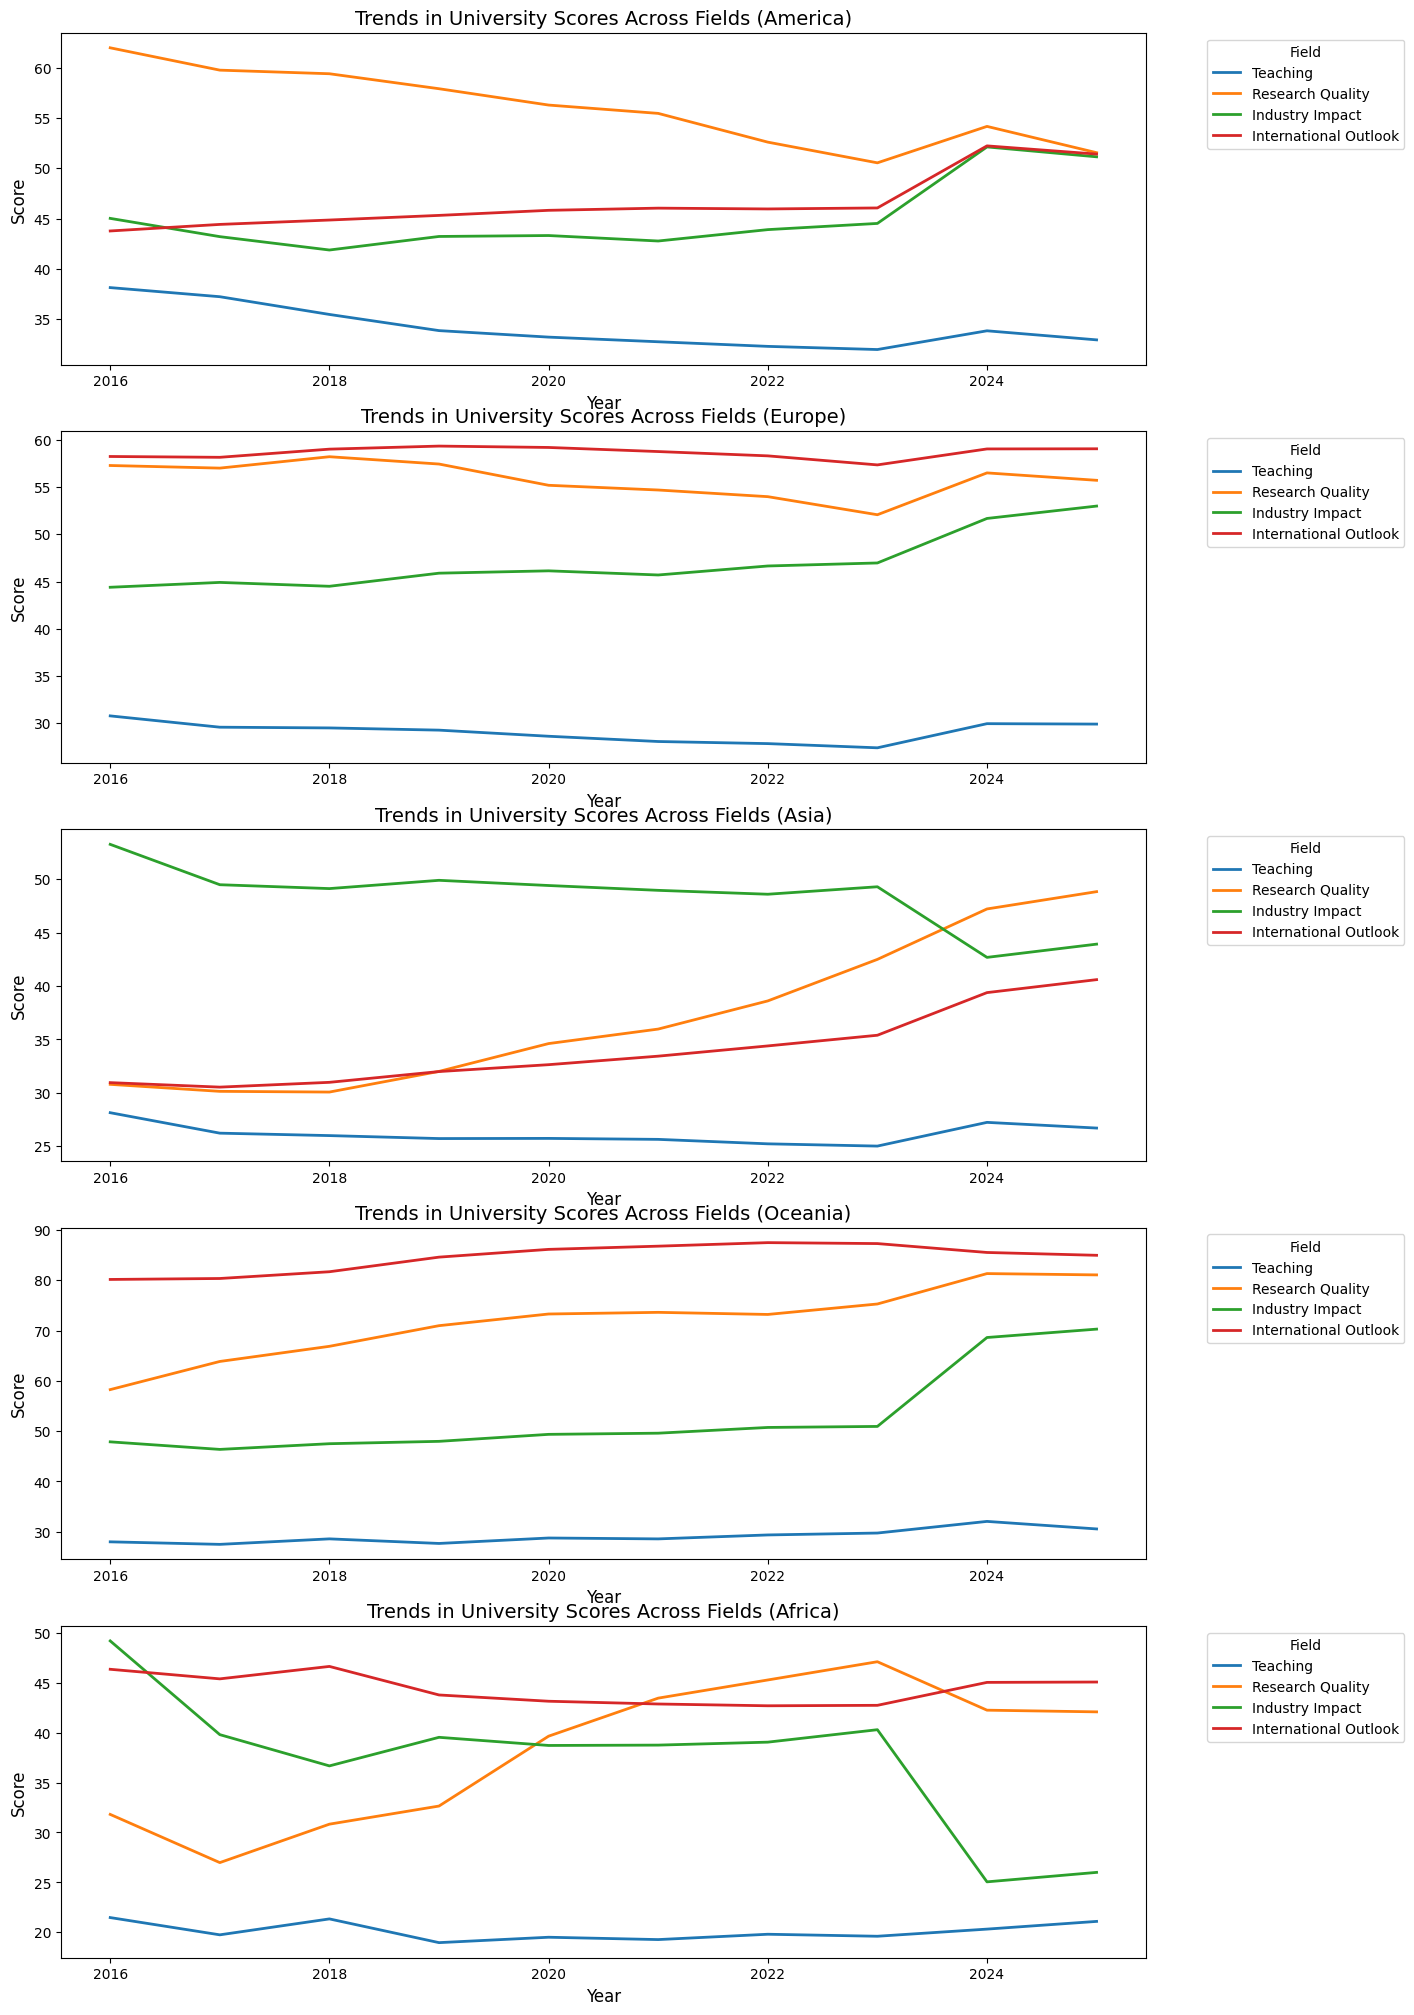

In [160]:
fields_of_study = ['Teaching', 'Research Quality', 'Industry Impact', 'International Outlook']
df_copy5 = df.copy()
df_copy_melted = df_copy5.melt(
    id_vars=['Year', 'Continent'],
    value_vars=fields_of_study,
    var_name='Field',
    value_name='Score'
)

continents = df_copy_melted['Continent'].unique()
plt.figure(figsize=(14, len(continents) * 5))

for i, continent in enumerate(continents, start=1):
    plt.subplot(len(continents), 1, i)
    continent_data = df_copy_melted[df_copy_melted['Continent'] == continent]
    sns.lineplot(
        data=continent_data,
        x='Year',
        y='Score',
        hue='Field',
        lw=2,
        errorbar=None
    )
    plt.title(f"Trends in University Scores Across Fields ({continent})", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.legend(title='Field', bbox_to_anchor=(1.05, 1), loc='upper left')


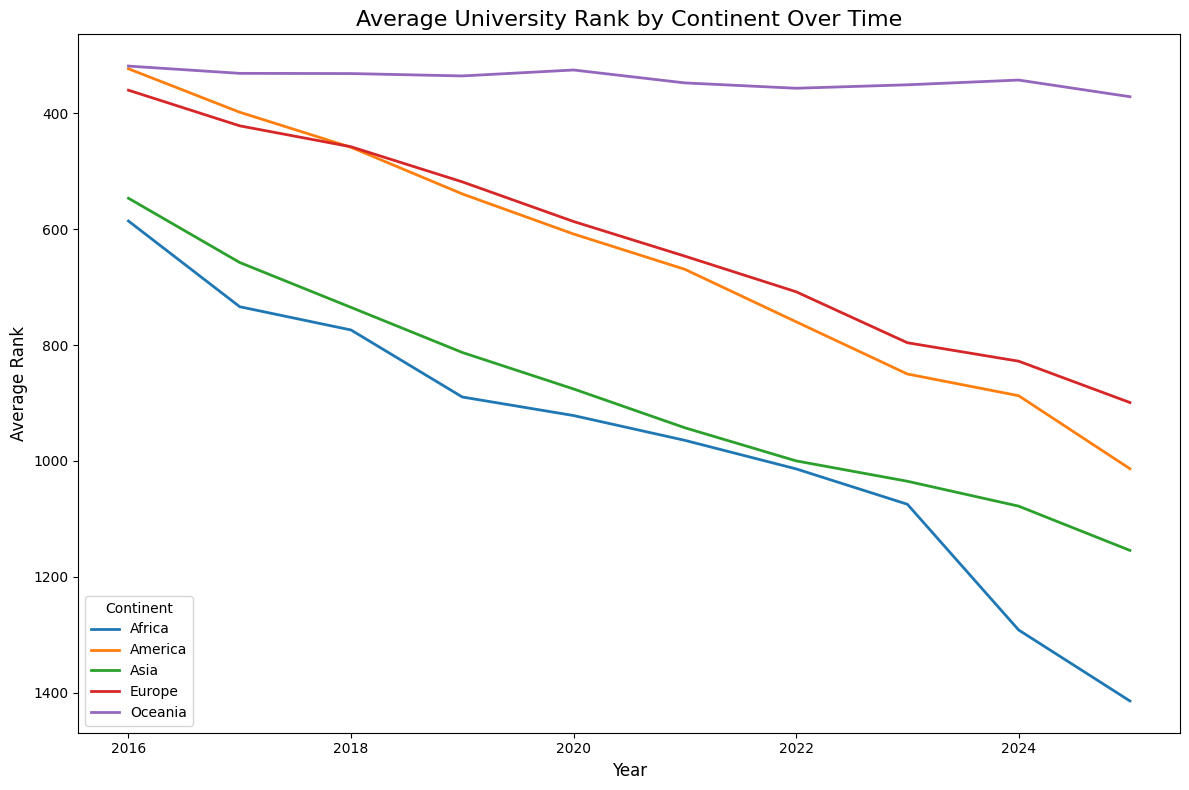

In [155]:

df_copy6 = df.copy()
continent_avg_rank = df_copy6.groupby(['Year', 'Continent'])['Rank'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=continent_avg_rank, x='Year', y='Rank', hue='Continent', linewidth=2)
plt.gca().invert_yaxis()
plt.title("Average University Rank by Continent Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Rank", fontsize=12)
plt.tight_layout()
plt.show()


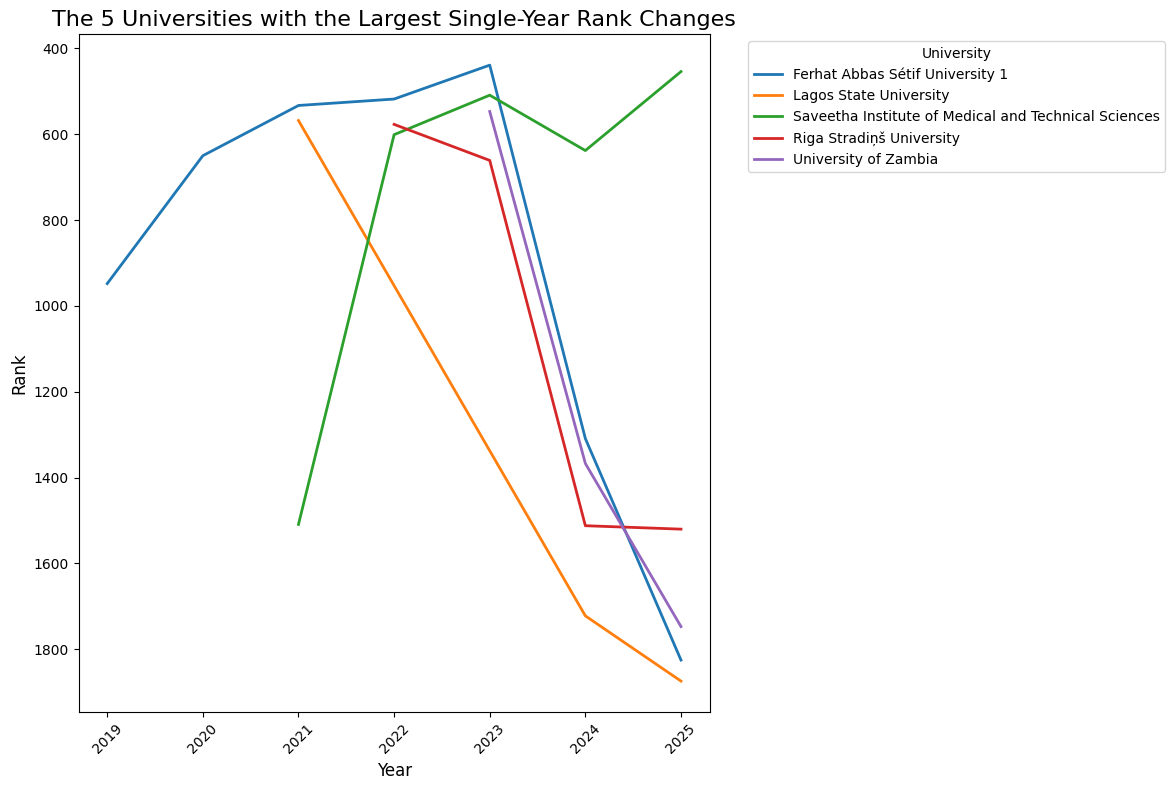

In [141]:
# Calculate year-over-year changes in rank

df_copy3 = df.copy()

df_copy3['Rank Change'] = df_copy3.groupby('Name')['Rank'].diff()

valid_groups = df_copy3.groupby('Name').filter(lambda group: group['Rank Change'].notna().any())

largest_jumps = valid_groups.loc[
    valid_groups.groupby('Name')['Rank Change'].apply(lambda x: x.dropna().abs().idxmax())
]

largest_jumps = largest_jumps.reset_index()
top_jumps = largest_jumps.loc[largest_jumps['Rank Change'].abs().nlargest(5).index]

plt.figure(figsize=(12, 8))
sns.lineplot(
    data=valid_groups[valid_groups['Name'].isin(top_jumps['Name'])],
    x='Year',
    y='Rank',
    hue='Name',
    markers=True,
    dashes=False,
    linewidth=2
)
plt.gca().invert_yaxis()
plt.title("The 5 Universities with the Largest Single-Year Rank Changes", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Rank", fontsize=12)
plt.legend(title='University', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
